# Carga de Liberias

In [31]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Carga de Datos a Python

In [4]:
name_taxi = pd.read_csv("moved_project_sql_result_01.csv")
viaje_taxi = pd.read_csv("moved_project_sql_result_04.csv")
clima_taxi = pd.read_csv("moved_project_sql_result_07.csv")

# Preparar Datos

In [5]:
def info_gral(datos):
    print("Primeras Filas")
    print(datos.head())
    print()
    print("Datos Generales")
    print(datos.info())
    print()
    print("Revision de Datos Ausentes")
    print(datos.isna().sum())
    print()
    print("Revision de Duplicados")
    print(datos.duplicated().sum())

## Compañia y cantidad de viajes

In [ ]:
info_gral(name_taxi)

Primeras Filas
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Revision de Datos Ausentes
company_name    0
trips_amount    0
dtype: int64

Revision de Duplicados
0


## barrios y promedio de viaje

In [10]:
info_gral(viaje_taxi)

Primeras Filas
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

Revision de Datos Ausentes
dropoff_location_name    0
average_trips            0
dtype: int64

Revision de Duplicados
0


In [14]:
top_barrios = ( viaje_taxi.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False).head(10).reset_index())

print(top_barrios)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


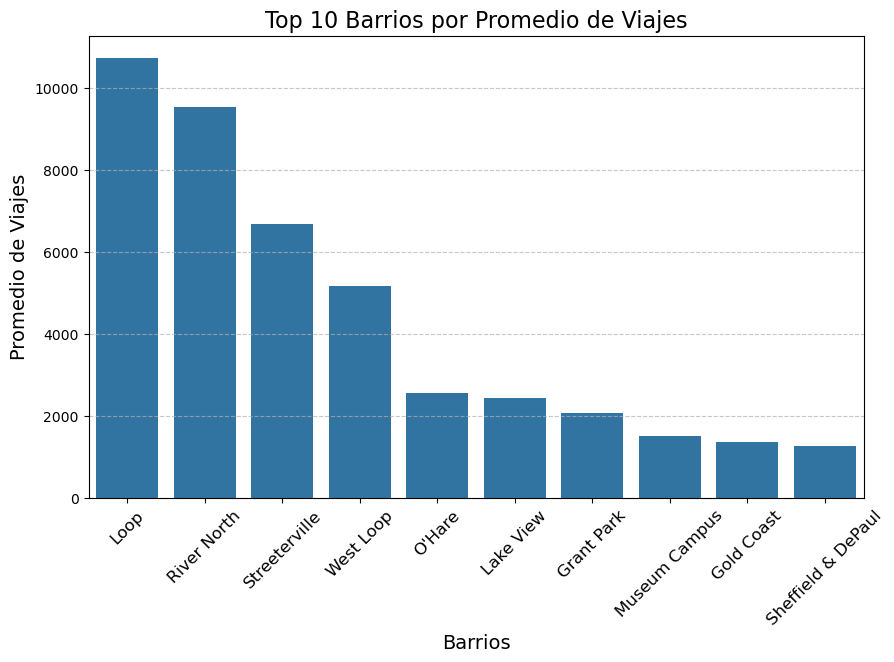

In [ ]:
# Crear gráfica de barras
plt.figure(figsize=(10, 6))

sns.barplot(data=top_barrios, x='dropoff_location_name', y='average_trips')

# Personalizar la gráfica
plt.title('Top 10 Barrios por Promedio de Viajes', fontsize=16)
plt.xlabel('Barrios', fontsize=14)
plt.ylabel('Promedio de Viajes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Analizamos cuales son los barrios mas frecuentados por los taxis y lo graficamos para visualizar cual es el barrio mas frecuente que en este caso salio Loop como primer lugar con un promedio de viaje de 10,727 y asi sucesivamente   

## condiciones climaticas, duracion de viaje y Fecha y hora de corrida

In [9]:
info_gral(clima_taxi)

Primeras Filas
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

Revision de Datos Ausentes
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Revision de Duplicados
197


H0: La duración promedio de los viajes desde el Loop hasta O'Hare en los sábados lluviosos no cambia significativamente respecto a otros días.

H1: La duración promedio de los viajes desde el Loop hasta O'Hare en los sábados lluviosos es diferente.


In [30]:
loop_to_ohare = viaje_taxi[(viaje_taxi['dropoff_location_name'] == "O'Hare")]

loop_to_ohare

,dropoff_location_name,average_trips
4,O'Hare,2546.9
